<a href="https://colab.research.google.com/github/waelrash1/time_series_forecasting_dt302-2/blob/main/JJ%20forecast%20SARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# JJ Data

In [2]:
install.packages("astsa")
install.packages("forecast")
library(astsa)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’




Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: ‘forecast’


The following object is masked from ‘package:astsa’:

    gas




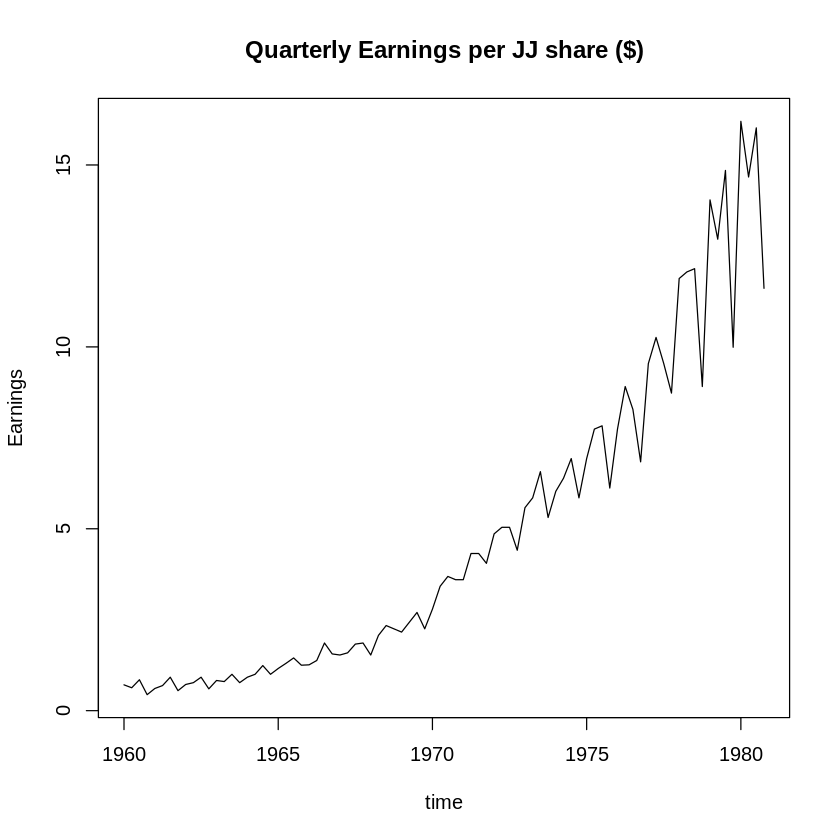

In [3]:
library(forecast)

plot(jj,xlab="time",ylab="Earnings",main="Quarterly Earnings per JJ share ($)")

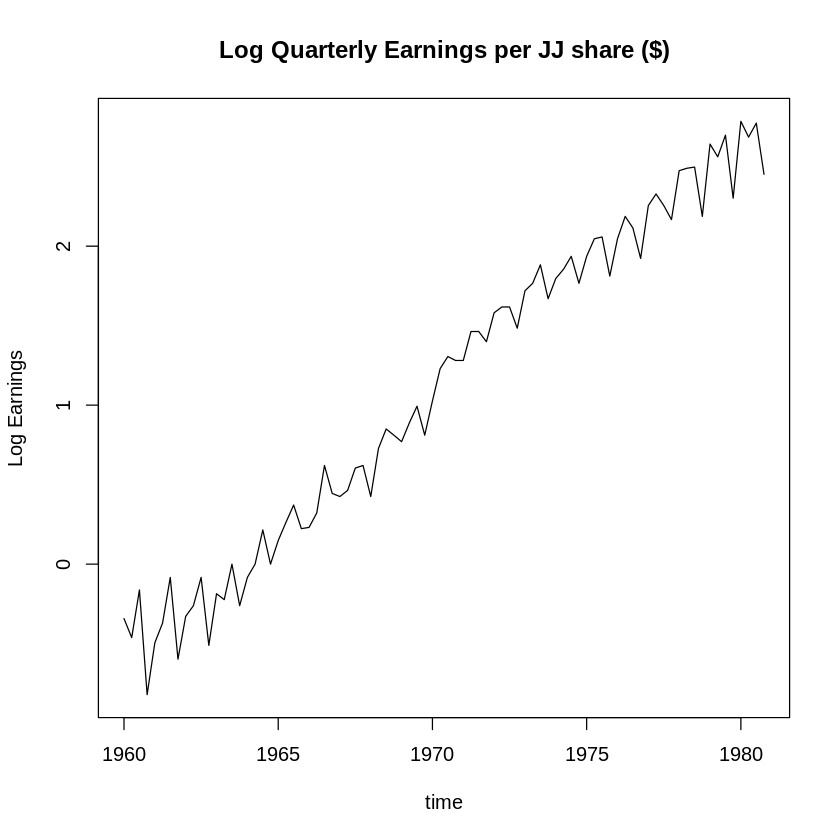

In [4]:
logjj=log(jj)

plot(logjj,xlab="time",ylab="Log Earnings",main="Log Quarterly Earnings per JJ share ($)")

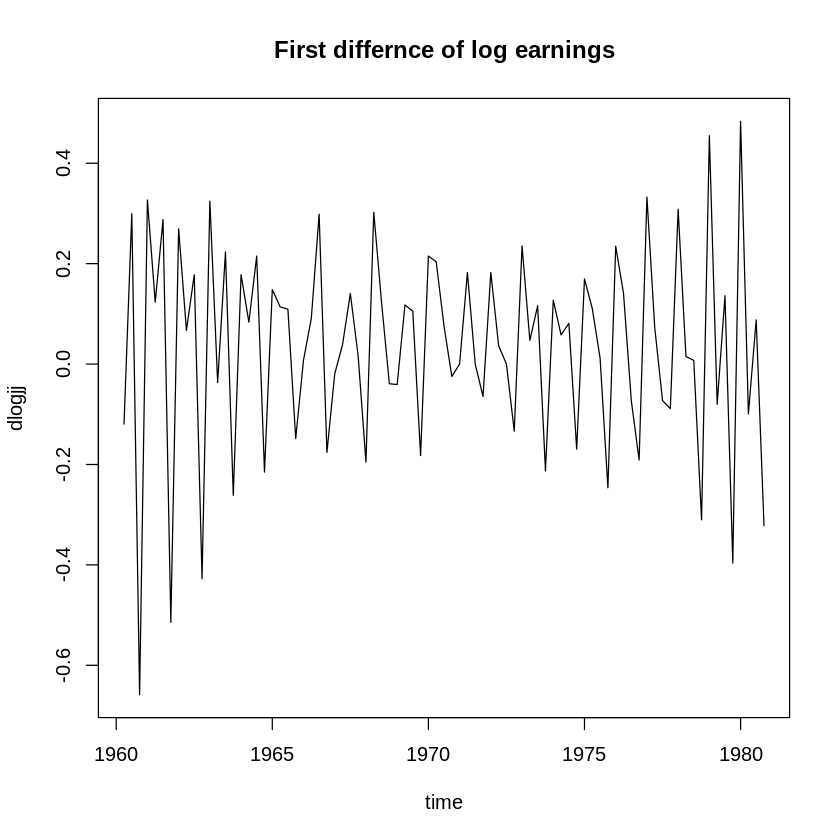

In [5]:
# Difference of log data
dlogjj=diff(logjj,d=1)

plot(dlogjj,main="First differnce of log earnings", xlab="time")

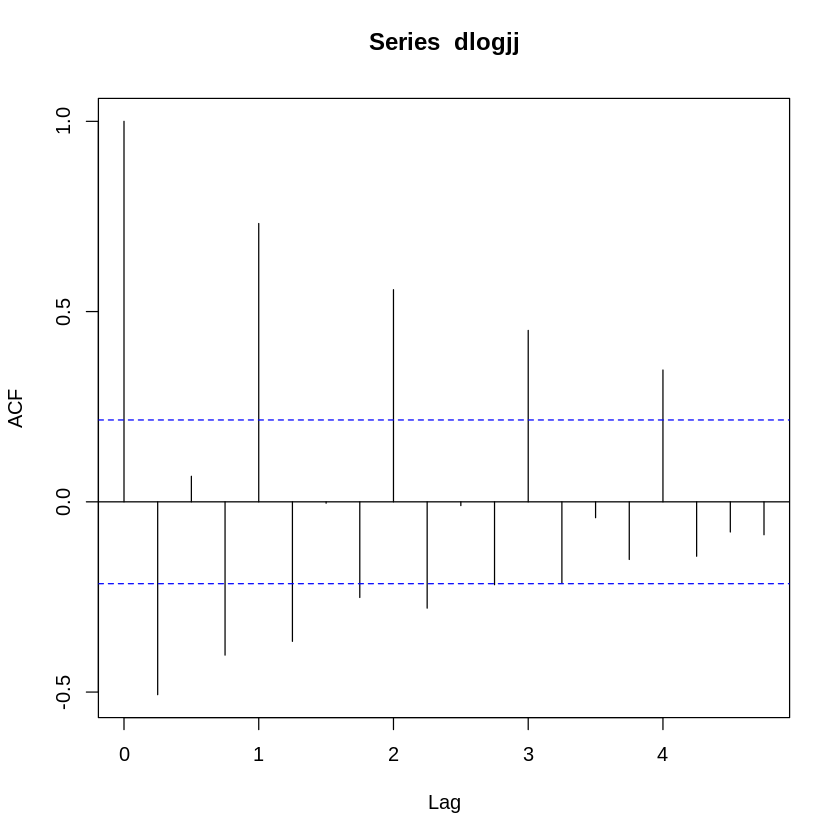

In [6]:
acf(dlogjj)

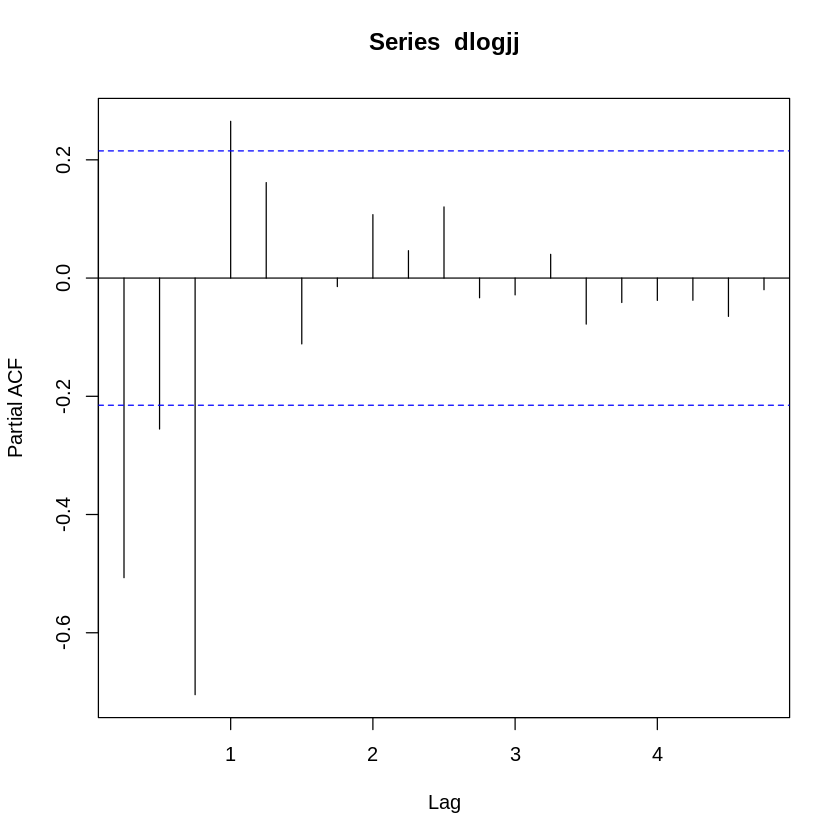

In [7]:
pacf(dlogjj)


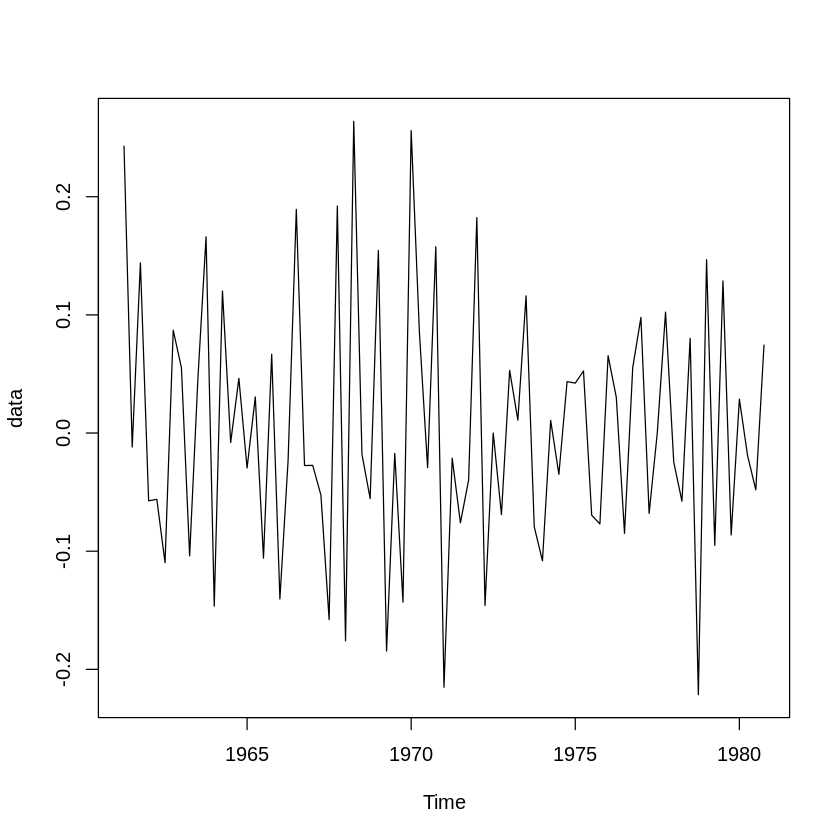

In [8]:
# Seasonal Difference D=4
data= diff(dlogjj,4)
plot(data)

In [9]:
Box.test(data,lag=log(length(data)))



	Box-Pierce test

data:  data
X-squared = 20.95, df = 4.3694, p-value = 0.0004658


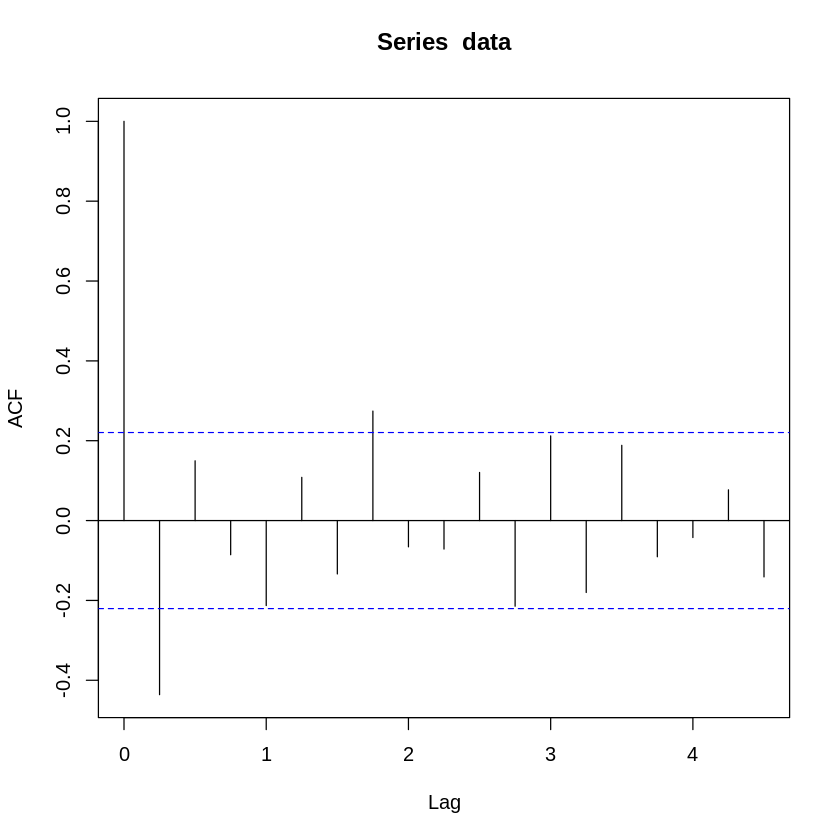

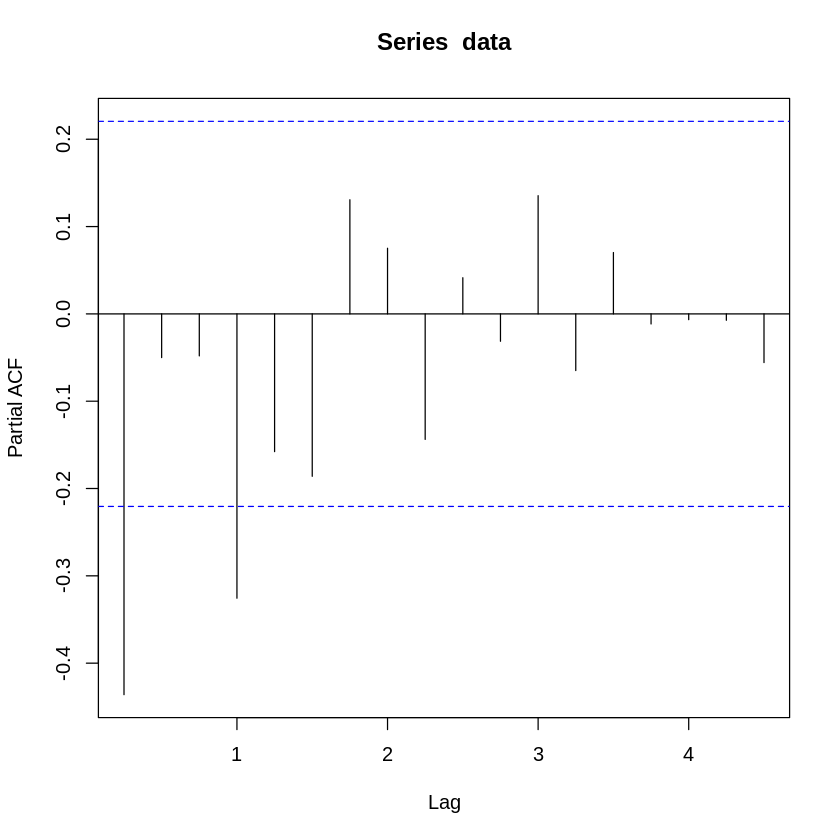

In [10]:
acf(data)
pacf(data)


In [11]:
d=1
DD=1
per=4
model_number=0
for(p in 1:2){
 for(q in 1:2){
  for(P in 1:2){
   for(Q in 1:2){
    if(p+d+q+P+DD+Q<=10){
      model_number=model_number+1
      model<-arima(x=log(jj),
                  order = c((p-1),d,(q-1)),
                  seasonal =list(order=c((P-1),DD,(Q-1)),
                  period=per))

      pval<-Box.test(model$residuals, lag=log(length(model$residuals)))
      
      sse<-sum(model$residuals^2)
      
      cat(model_number,"- SARIMA(",p-1,d,q-1,P-1,DD,Q-1,per,")", 'AIC=', model$aic, ' SSE=',sse,' p-VALUE=', pval$p.value,'\n')
    }
   }
  }
 }
}

1 - SARIMA( 0 1 0 0 1 0 4 ) AIC= -124.0685  SSE= 0.9377871  p-VALUE= 0.0002610795 
2 - SARIMA( 0 1 0 0 1 1 4 ) AIC= -126.3493  SSE= 0.8856994  p-VALUE= 0.0001606542 
3 - SARIMA( 0 1 0 1 1 0 4 ) AIC= -125.9198  SSE= 0.8908544  p-VALUE= 0.0001978052 
4 - SARIMA( 0 1 0 1 1 1 4 ) AIC= -124.3648  SSE= 0.8854554  p-VALUE= 0.000157403 
5 - SARIMA( 0 1 1 0 1 0 4 ) AIC= -145.5139  SSE= 0.6891988  p-VALUE= 0.03543717 
6 - SARIMA( 0 1 1 0 1 1 4 ) AIC= -150.7528  SSE= 0.6265214  p-VALUE= 0.6089542 
7 - SARIMA( 0 1 1 1 1 0 4 ) AIC= -150.9134  SSE= 0.6251634  p-VALUE= 0.707918 
8 - SARIMA( 0 1 1 1 1 1 4 ) AIC= -149.1317  SSE= 0.6232876  p-VALUE= 0.6780876 
9 - SARIMA( 1 1 0 0 1 0 4 ) AIC= -139.8248  SSE= 0.7467494  p-VALUE= 0.03503386 
10 - SARIMA( 1 1 0 0 1 1 4 ) AIC= -146.0191  SSE= 0.6692691  p-VALUE= 0.5400176 
11 - SARIMA( 1 1 0 1 1 0 4 ) AIC= -146.0319  SSE= 0.6689661  p-VALUE= 0.5612964 
12 - SARIMA( 1 1 0 1 1 1 4 ) AIC= -144.3766  SSE= 0.6658382  p-VALUE= 0.5459445 
13 - SARIMA( 1 1 1 0 1 0 

Model 7 is the best model based on aic=-150.9134; SARIMA(0,1,1,1,1,0,)4.

In [ ]:
model<-arima(x=log(jj),
                  order = c(0,1,1),
                  seasonal =list(order=c(1,1,0),
                  period=per))
model

Xt=JJ  Earnings

Yt=log(Xt)

(1−B)(1−B4)(1−Φ1B4)Yt=(1+Θ1B)Zt
where Φ1=−0.3220 with standard error 0.1124 and θ1=−0.6796 with standard error 0.0969

In [ ]:
checkresiduals(model)

In [ ]:
tsdiag (model)

In [ ]:
ff=forecast(model)
ff

In [ ]:
plot(forecast(model)) # ‘forecast’  package